In [312]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

# Assignment 5

## 1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 

#### Training Error (MSE, MAE)
#### Testing Error (MSE, MAE)

In [505]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [506]:
# Training dataset
df = pd.read_csv('../data/WineQT.csv')

In [507]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [508]:
y = df["quality"]
x = df.drop(["quality"], axis = 1)

In [509]:
y.shape, y.size

((1143,), 1143)

In [510]:
x.shape, x.size

((1143, 11), 12573)

In [511]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [512]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg.coef_, linreg.intercept_

(array([ 3.52014388e-02, -1.25545841e+00, -1.95263656e-01,  3.73997716e-02,
        -1.01650052e+00,  3.15500888e-03, -2.92954264e-03, -2.57560647e+01,
        -3.65857460e-01,  8.52444698e-01,  2.76814161e-01]),
 29.56713880147927)

In [513]:
pred = linreg.predict(x_train)

In [514]:
sugar = x_train["residual sugar"]

In [515]:
sugar.shape, pred.shape

((571,), (571,))

In [516]:
x["residual sugar"]

0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
1138    2.3
1139    1.9
1140    2.0
1141    2.2
1142    2.0
Name: residual sugar, Length: 1143, dtype: float64

Text(0, 0.5, 'Wine Quality')

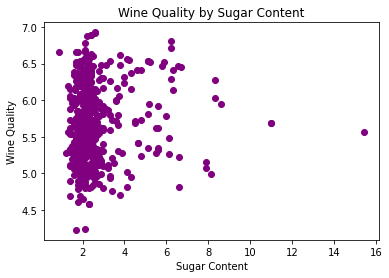

In [517]:
plt.scatter(sugar, pred, c = "purple")
plt.title("Wine Quality by Sugar Content")
plt.xlabel("Sugar Content")
plt.ylabel("Wine Quality")

In [518]:
# Train MSE and MAE
print(mean_squared_error(y_train, pred))
print(mean_absolute_error(y_train, pred))

0.4072717426809166
0.4928165290238493


In [519]:
# Test MSE and MAE
print(mean_squared_error(y_test, np.dot(x_test, linreg.coef_) + linreg.intercept_))
print(mean_absolute_error(y_test, np.dot(x_test, linreg.coef_) + linreg.intercept_))

0.41026340600789724
0.49381024650594163


## 2. Choose a classification dataset (not the adult.data set, perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate: 
#### Accuracy
#### Confusion Matrix
#### Classifcation Report

### Import libraries, define model, test/train/split

In [622]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix
                            )

In [668]:
model = DecisionTreeClassifier(criterion = "entropy")

In [669]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.50)

### Train

In [670]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

##### Feature Importances

In [671]:
list(zip(x.columns, model.feature_importances_))

[('fixed acidity', 0.03884855877421978),
 ('volatile acidity', 0.11937327390873251),
 ('citric acid', 0.0498004344712837),
 ('residual sugar', 0.062204377376524456),
 ('chlorides', 0.08011096631726064),
 ('free sulfur dioxide', 0.06113308796761024),
 ('total sulfur dioxide', 0.10734002681534853),
 ('density', 0.07204365799901943),
 ('pH', 0.05174406717950998),
 ('sulphates', 0.1470354927426774),
 ('alcohol', 0.21036605644781345)]

In [672]:
predictions = model.predict(x_train)

In [674]:
x_test.shape, x_train.shape

((572, 11), (571, 11))

In [675]:
y_test.shape, y_train.shape

((572,), (571,))

In [673]:
predictions.shape, test_predictions.shape

((571,), (572, 1))

### Test

In [665]:
test_predictions = model.predict(x_test)

In [666]:
test_predictions = np.asmatrix(test_predictions)
test_predictions = test_predictions.reshape(-1,1)

In [667]:
accuracy_score(y_test, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [572, 571]

In [662]:
accuracy_score(y_test, test_predictions)

0.5437062937062938

In [632]:
confusion_matrix(y_test, test_predictions)

array([[  0,   0,   2,   1,   0,   0],
       [  0,   1,  10,   5,   1,   0],
       [  0,   7, 142,  86,  15,   0],
       [  0,  11,  48, 131,  22,   3],
       [  0,   2,   3,  34,  37,   1],
       [  0,   0,   1,   3,   6,   0]], dtype=int64)

In [633]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.05      0.06      0.05        17
           5       0.69      0.57      0.62       250
           6       0.50      0.61      0.55       215
           7       0.46      0.48      0.47        77
           8       0.00      0.00      0.00        10

    accuracy                           0.54       572
   macro avg       0.28      0.29      0.28       572
weighted avg       0.55      0.54      0.54       572



c:\users\cneub\desktop\mlnn-masamitsu\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cneub\desktop\mlnn-masamitsu\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cneub\desktop\mlnn-masamitsu\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)